# decision trees

#### importing the packages 

In [48]:
import numpy as n
import pandas as p
import matplotlib.pyplot as plt


## reading data from csv file

In [49]:
df=p.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [50]:
df.shape

(200, 6)

## pre processing
x - feature matrix
y- response vector

In [51]:
x=df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values


In [52]:
p.get_dummies(df)[5:13]

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX,Drug_drugY
5,22,8.607,1,0,0,0,1,1,0,0,0,0,1,0
6,49,16.275,1,0,0,0,1,1,0,0,0,0,0,1
7,41,11.037,0,1,0,1,0,1,0,0,0,1,0,0
8,60,15.171,0,1,0,0,1,1,0,0,0,0,0,1
9,43,19.368,0,1,0,1,0,0,1,0,0,0,0,1
10,47,11.767,1,0,0,1,0,1,0,0,0,1,0,0
11,34,19.199,1,0,1,0,0,0,1,0,0,0,0,1
12,43,15.376,0,1,0,1,0,1,0,0,0,0,0,1


In [53]:
df[5:13]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY
10,47,F,LOW,HIGH,11.767,drugC
11,34,F,HIGH,NORMAL,19.199,drugY
12,43,M,LOW,HIGH,15.376,drugY


In [57]:
df1=df

from sklearn.preprocessing import  LabelEncoder
df1['Sex']=LabelEncoder().fit_transform(df1['Sex'])
df1['BP']=LabelEncoder().fit_transform(df1['BP'])
df1['Cholesterol']=LabelEncoder().fit_transform(df1['Cholesterol'])
x1=df1[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values

y1=df1['Drug']




spliting the data into test and train sets

In [65]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x1,y1,test_size=0.2)
# train_x[3:9],test_x[3:9],train_y[3:9],test_y[3:9]



#### decision tree model

In [71]:
from sklearn import tree
drugtree=tree.DecisionTreeClassifier(criterion="entropy",max_depth=4)
drugtree.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [73]:
predict=drugtree.predict(test_x)
predict[0:10]

array(['drugA', 'drugX', 'drugY', 'drugX', 'drugA', 'drugY', 'drugY',
       'drugY', 'drugX', 'drugY'], dtype=object)

#### metrics calculation

In [75]:
from sklearn import metrics
score=metrics.accuracy_score(test_y,predict)
print(score)

0.975


### visualization

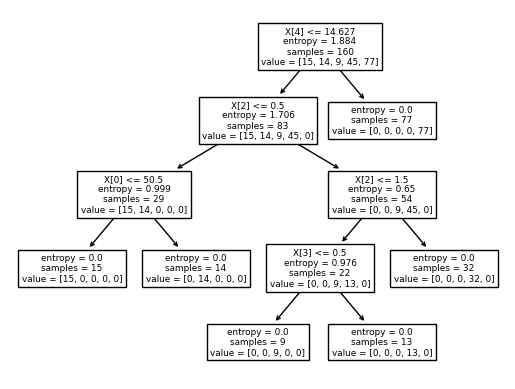

In [77]:
tree.plot_tree(drugtree)
plt.show()